In [1]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv(r"C:\Users\HP\Downloads\heart_disease_data.csv")

In [3]:
# print first 15 rows of the dataset
heart_data.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [6]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Exploratory Data Analysis (EDA)

In [9]:
print(heart_data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

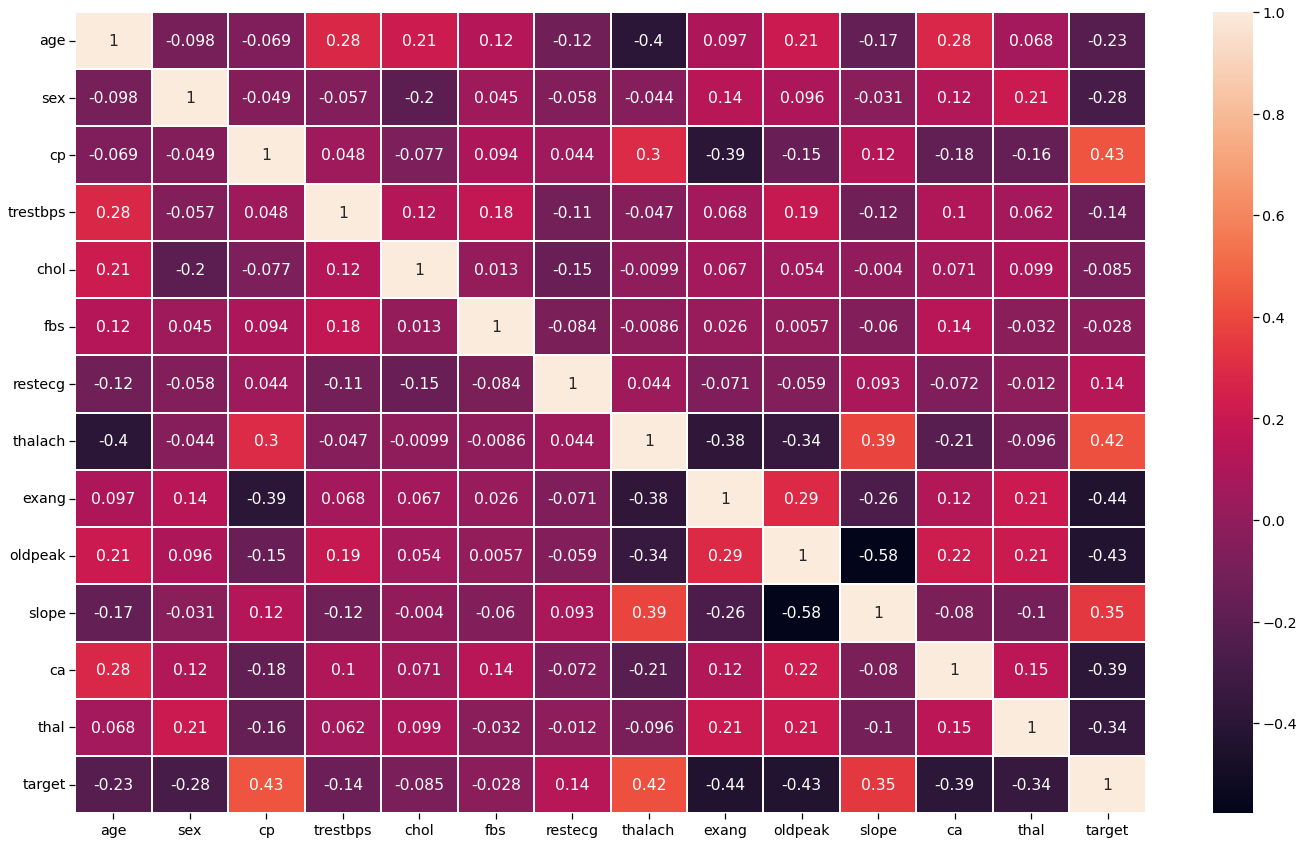

In [10]:
#Corelation between values
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(heart_data.corr(),annot=True,linewidth =2)
plt.tight_layout()

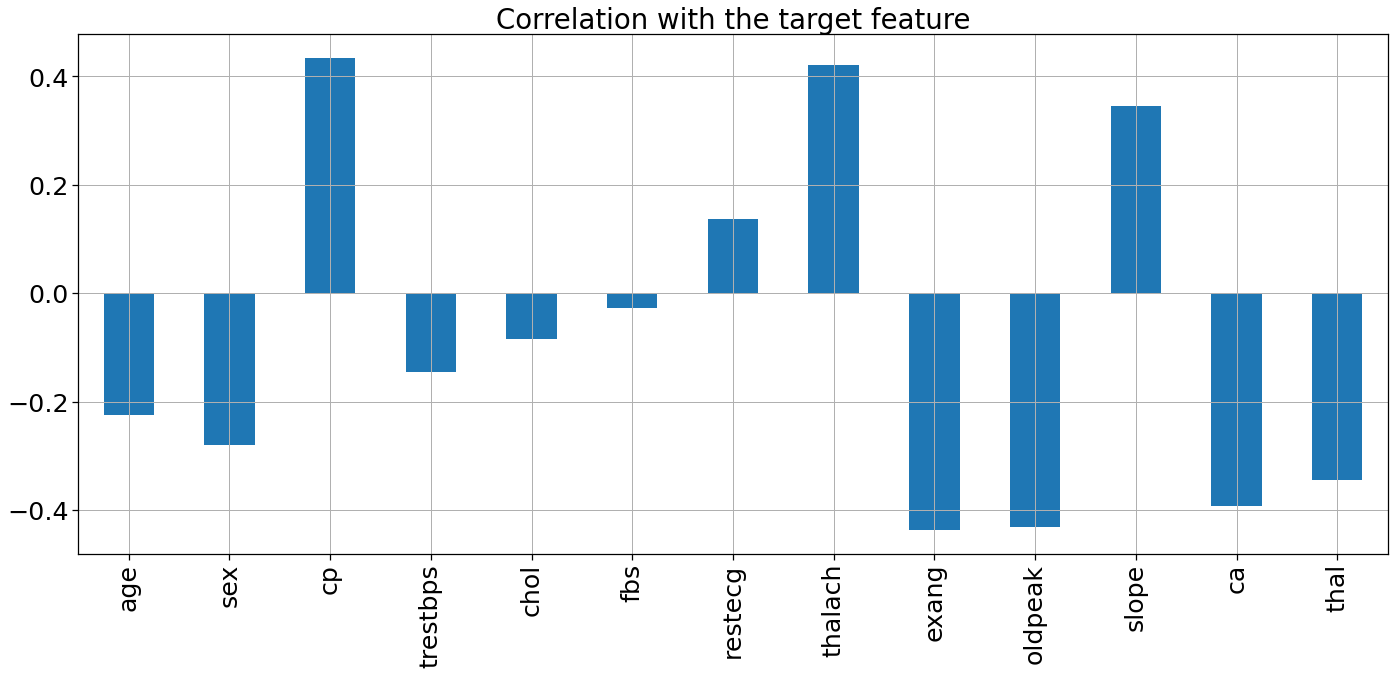

In [11]:
#Corelation with target value
sns.set_context('notebook',font_scale = 2.3)
heart_data.drop('target', axis=1).corrwith(heart_data.target).plot(kind='bar', grid=True, figsize=(20, 10), 
                                                        title="Correlation with the target feature")
plt.tight_layout()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


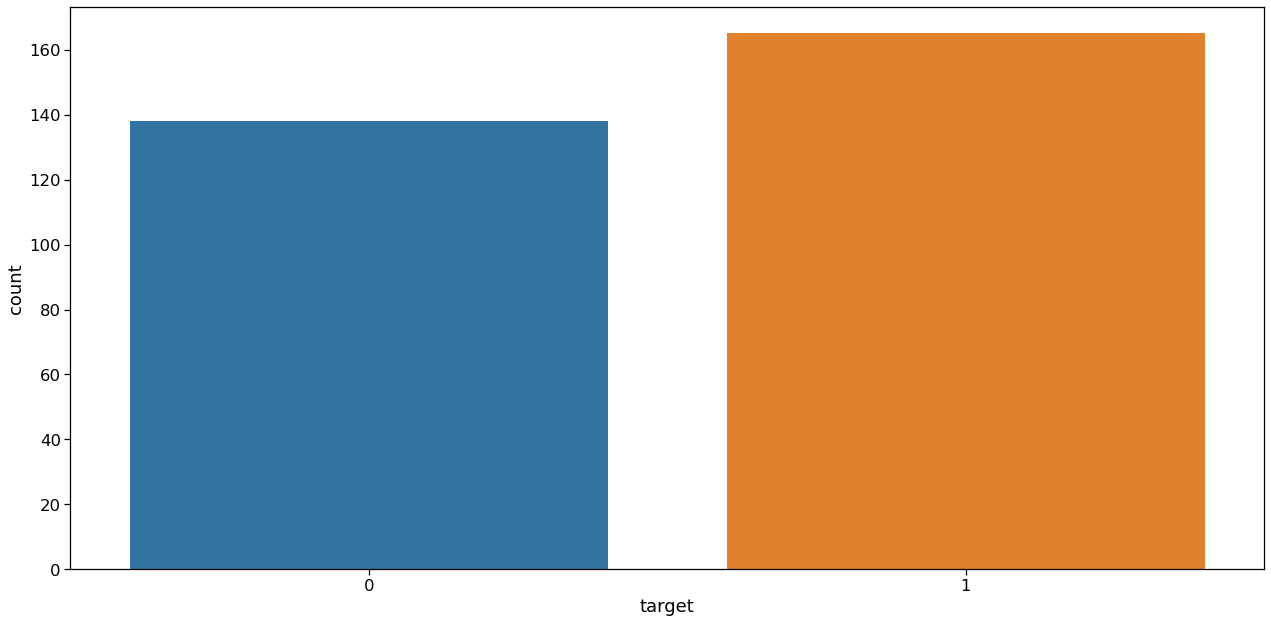

In [12]:
#Check dataset 
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(heart_data['target'])
plt.tight_layout()

In [13]:
target_temp = heart_data.target.value_counts()
print(target_temp)

1    165
0    138
Name: target, dtype: int64


1    165
0    138
Name: target, dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


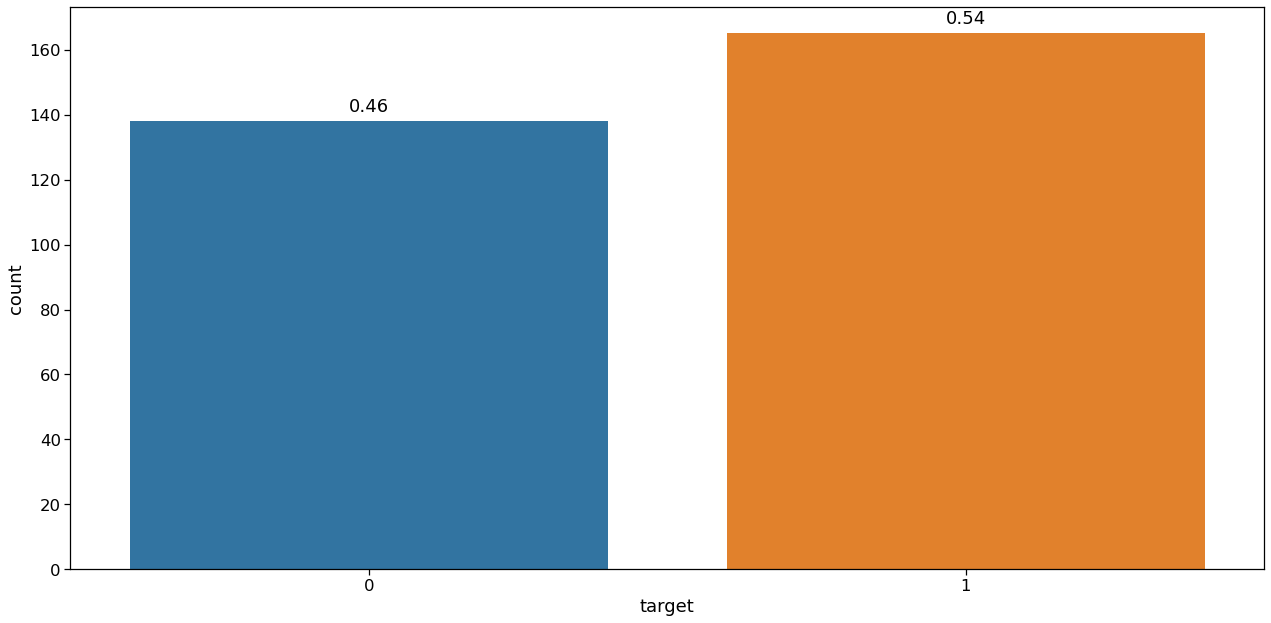

In [14]:
#Check percentage
total=303
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
ax=sns.countplot(heart_data['target'])
plt.tight_layout()
target_temp = heart_data.target.value_counts()
print(target_temp)

# for showing the percentage
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 

From the total dataset of 303 patients, 165 (54%) have a heart disease (target=1) and 138 patients (46%) are without heart problem

In [15]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


In [16]:
#Age fearture Analysis
minAge=min(heart_data.age)
maxAge=max(heart_data.age)
meanAge=heart_data.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.366336633663366


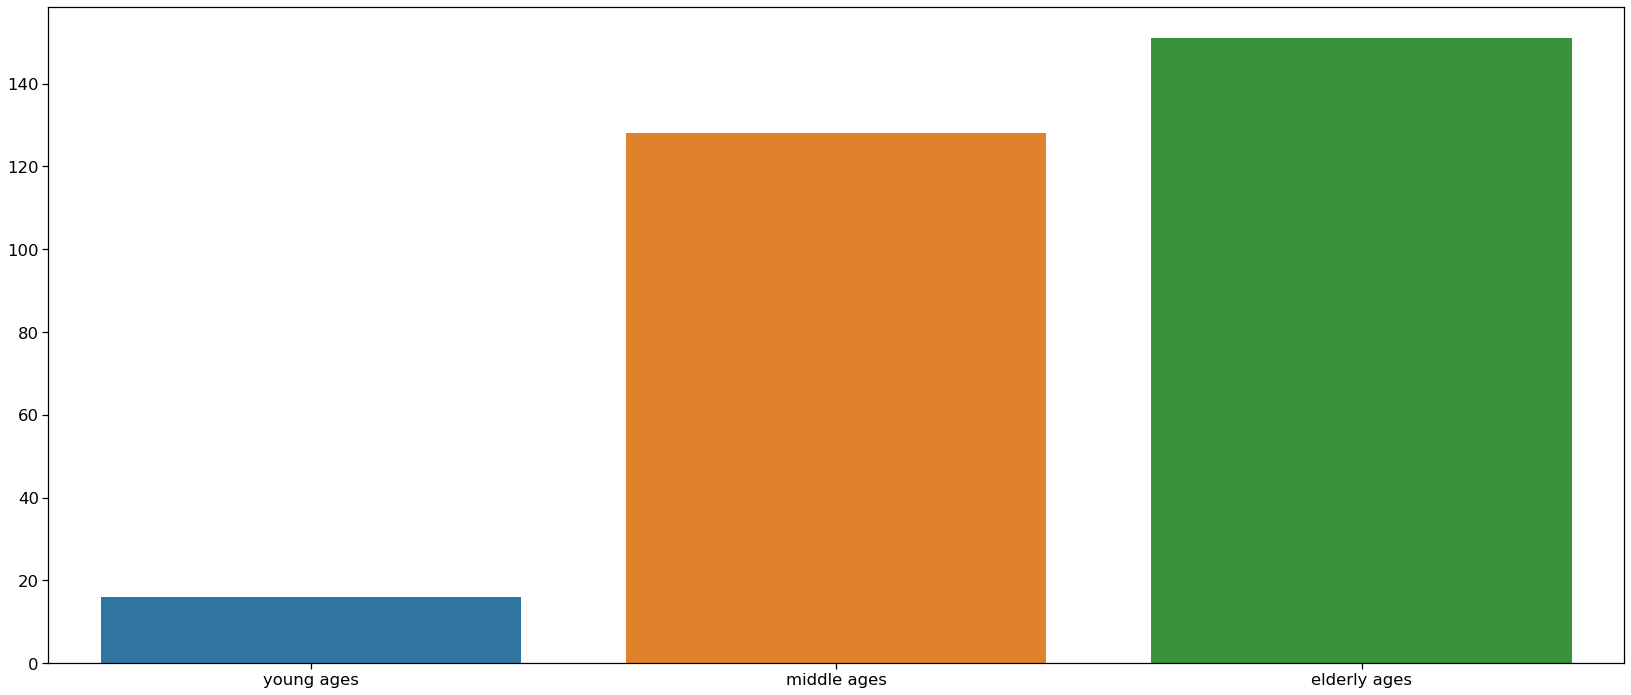

In [17]:
Young = heart_data[(heart_data.age>=29)&(heart_data.age<40)]
Middle = heart_data[(heart_data.age>=40)&(heart_data.age<55)]
Elder = heart_data[(heart_data.age>55)]

plt.figure(figsize=(23,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

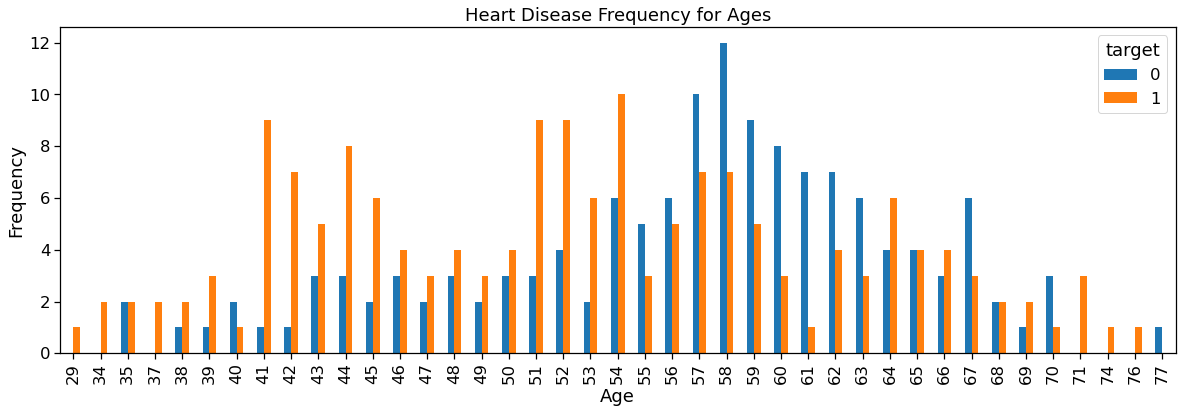

In [18]:
#Heart Disease Frequency for ages
pd.crosstab(heart_data.age,heart_data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

elder people are the most affected by heart disease and young ones are the least affected.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


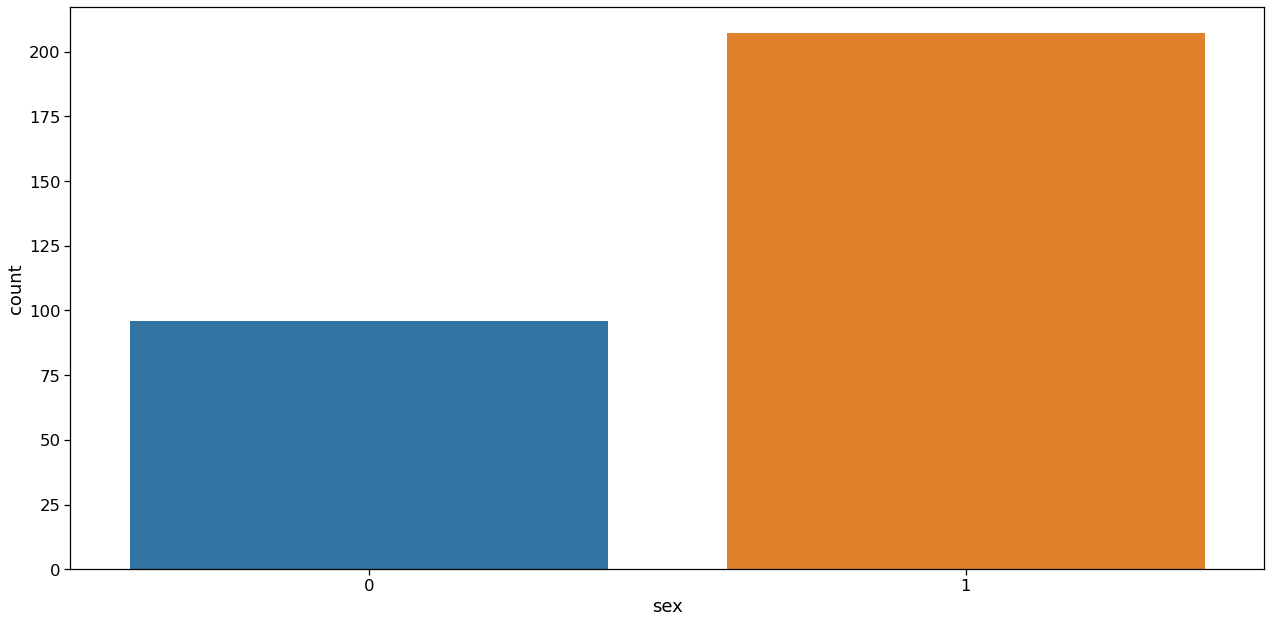

In [19]:
#Sex Feature Analysis
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(heart_data['sex'])
plt.tight_layout()

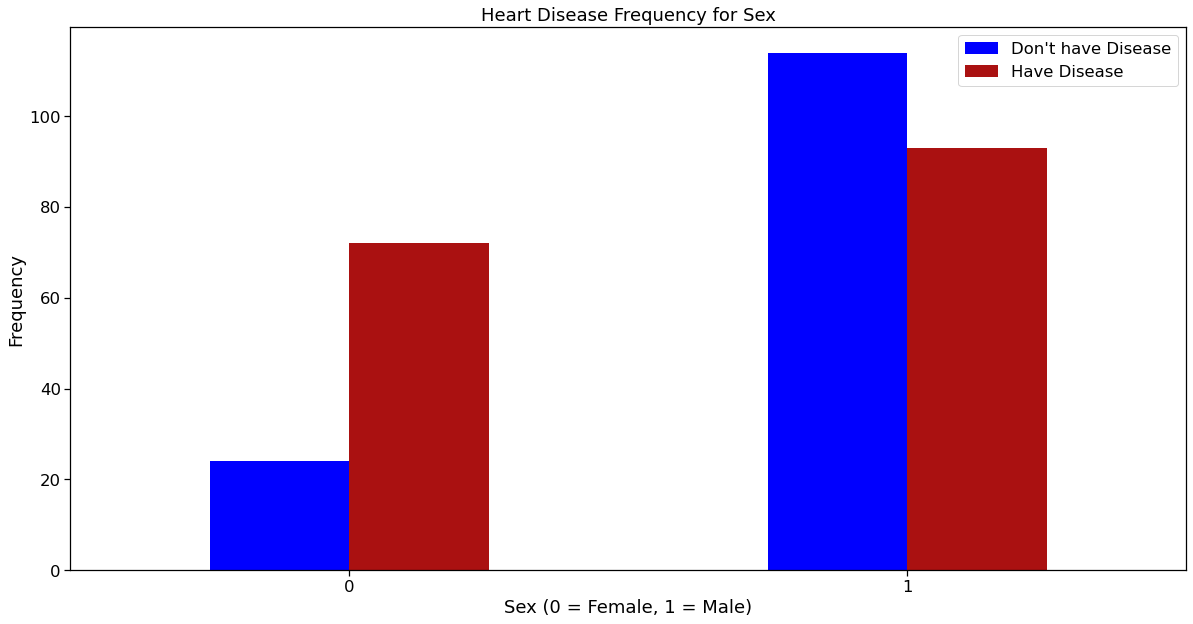

In [20]:
#Heart Disease frequency for sex (0-->female,1-->male)
pd.crosstab(heart_data.sex,heart_data.target).plot(kind="bar",figsize=(20,10),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

Males are more  affected by heart disease as compared to females.

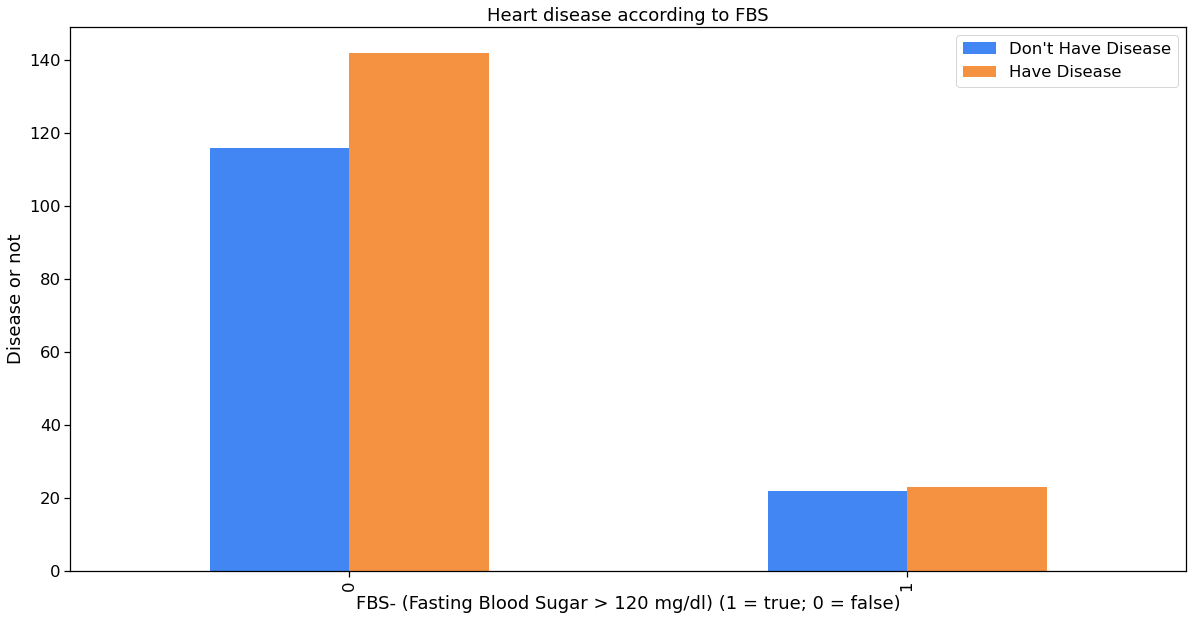

In [21]:
#Heart disease according to Fasting Blood sugar
pd.crosstab(heart_data.fbs,heart_data.target).plot(kind="bar",figsize=(20,10),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Don't Have Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp', ylabel='target'>

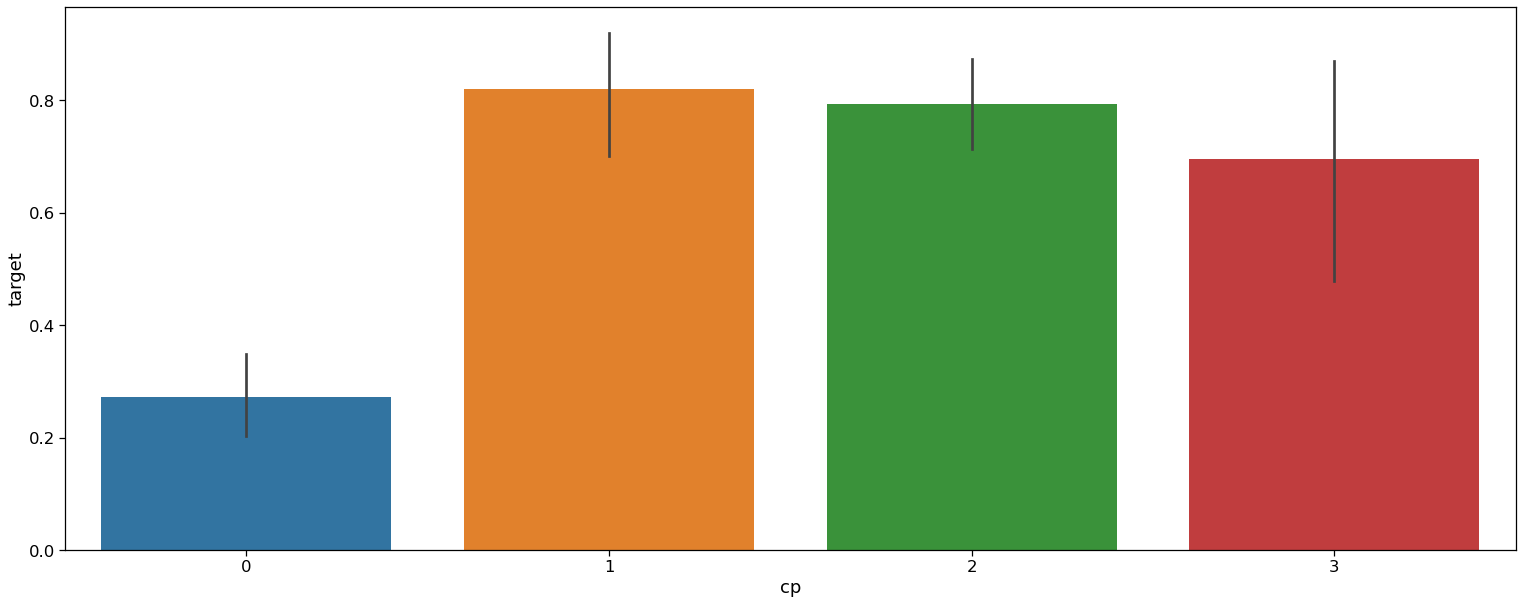

In [22]:
#Analysing the chest pain (4 types of chest pain)
#[Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic]

heart_data["cp"].unique()
plt.figure(figsize=(26, 10))
sns.barplot(heart_data["cp"],heart_data["target"])

In [23]:
#Analysing The person's resting blood pressure (mm Hg on admission to the hospital)
heart_data["trestbps"].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trestbps', ylabel='target'>

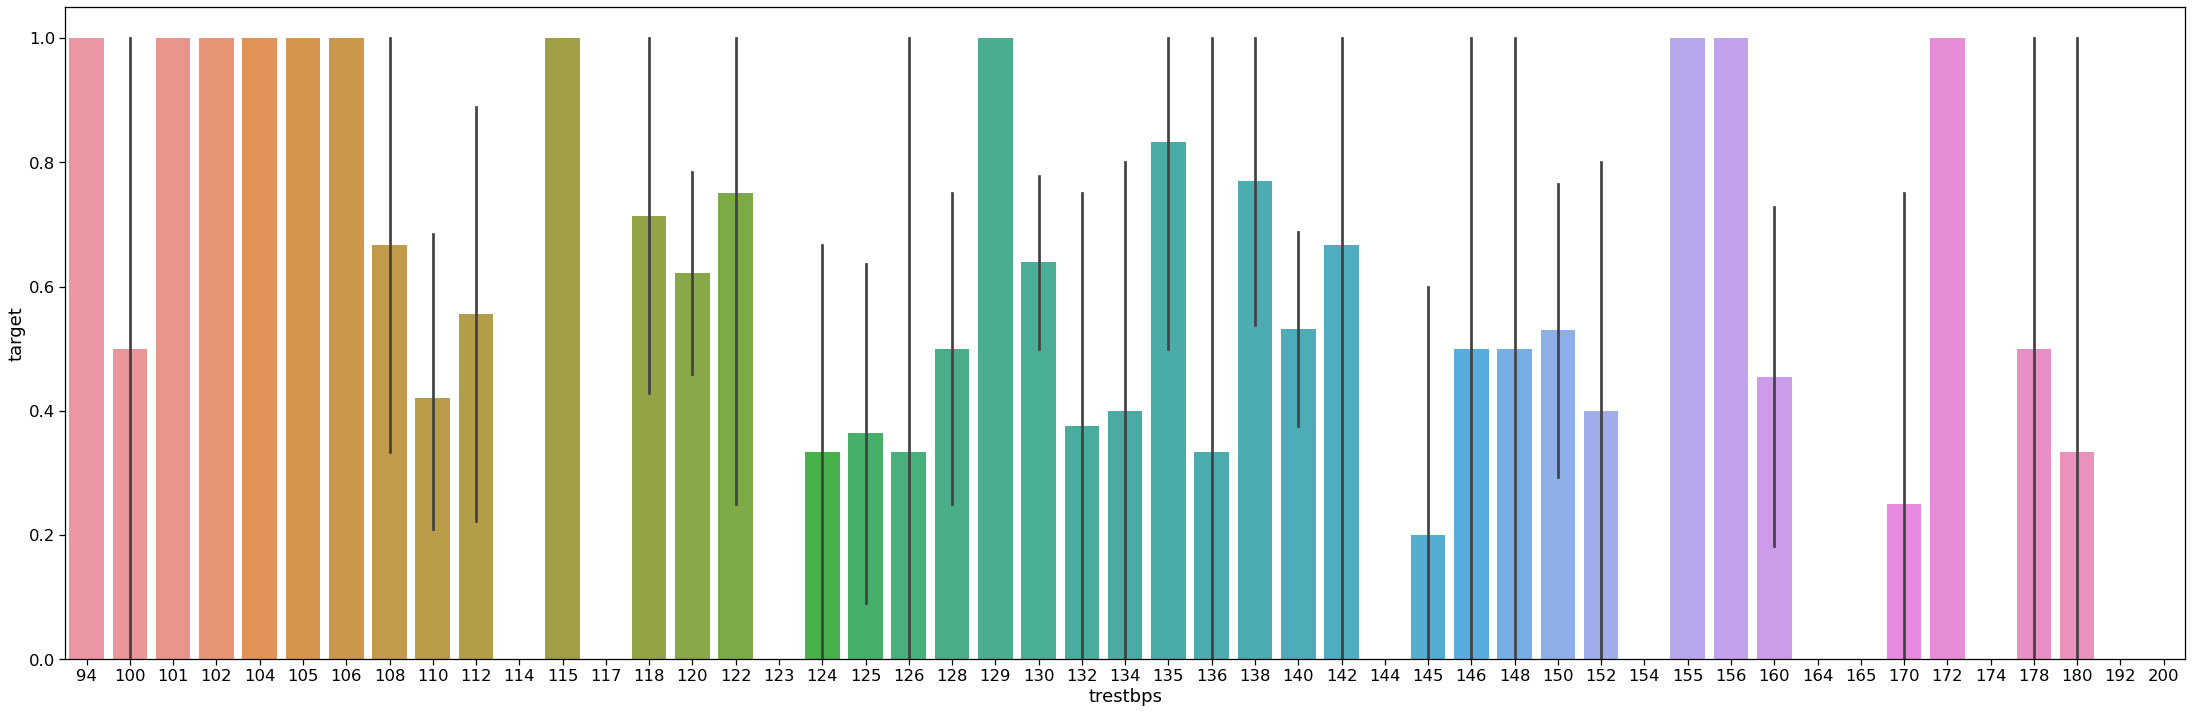

In [24]:
plt.figure(figsize=(38, 12))
sns.barplot(heart_data["trestbps"],heart_data["target"])

#Analysing the Resting electrocardiographic measurement 
#(0 = normal, 1 = having ST-T wave abnormality,
#(2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)


In [25]:
heart_data["restecg"].unique()

array([0, 1, 2], dtype=int64)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='restecg', ylabel='target'>

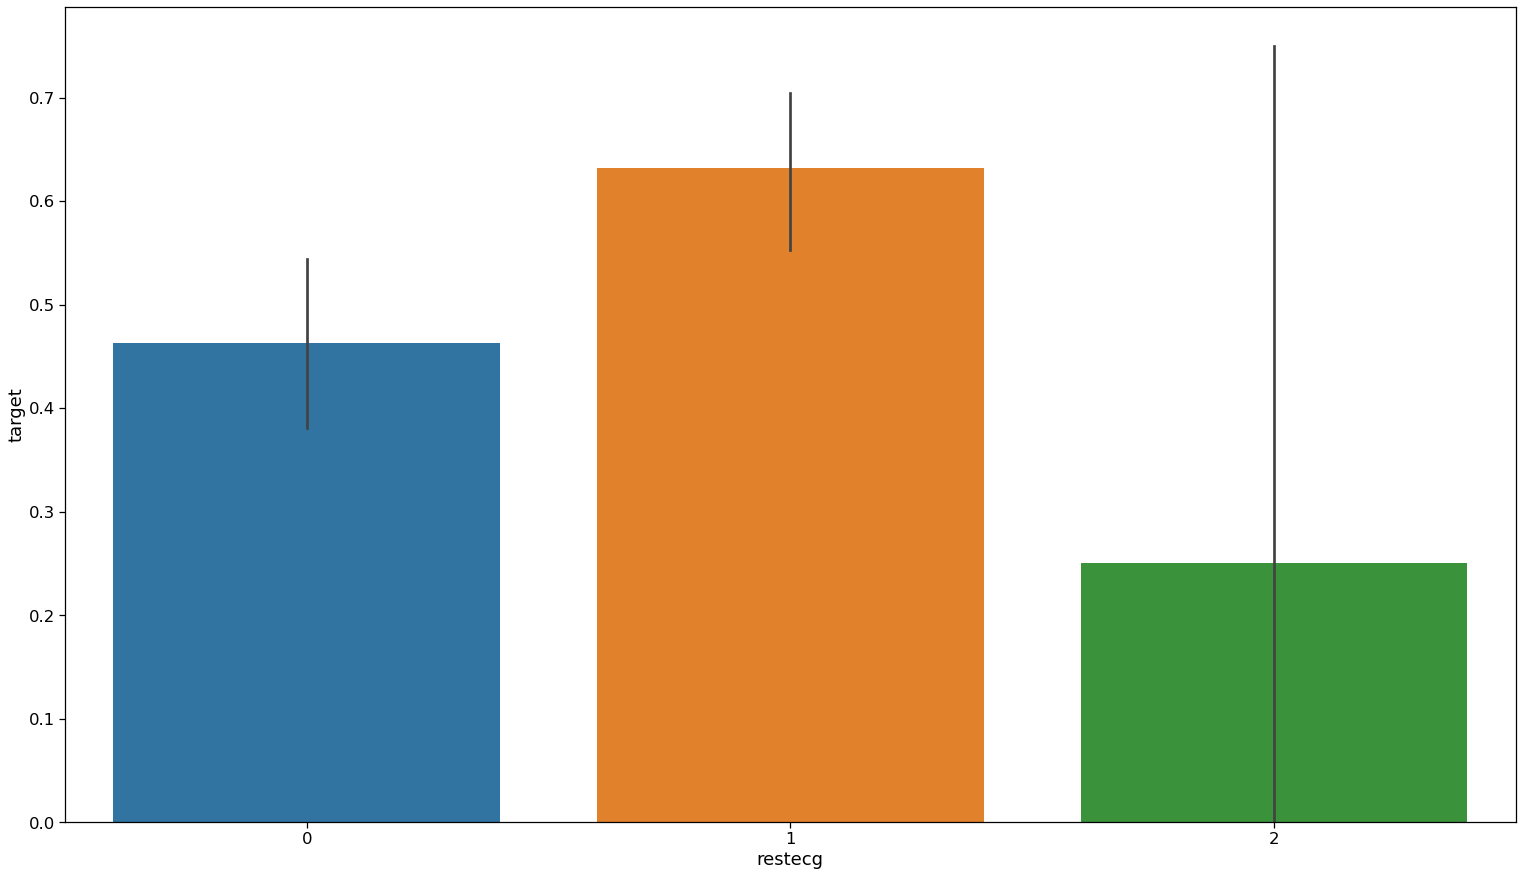

In [26]:
plt.figure(figsize=(26, 15))
sns.barplot(heart_data["restecg"],heart_data["target"])

people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

In [27]:
#Analysing Exercise induced angina (1 = yes; 0 = no)
heart_data["exang"].unique()

array([0, 1], dtype=int64)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='exang', ylabel='target'>

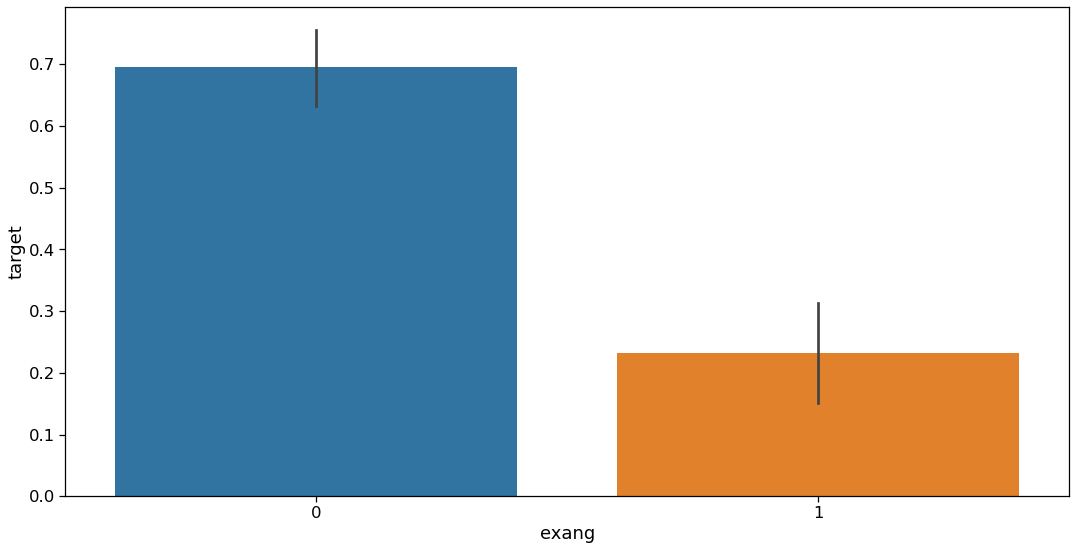

In [28]:
plt.figure(figsize=(18, 9))
sns.barplot(heart_data["exang"],heart_data["target"])

People with exercise_induced_angina=1 are much less likely to have heart problems

In [29]:
#Analysing the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
heart_data["slope"].unique()

array([0, 2, 1], dtype=int64)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='slope', ylabel='target'>

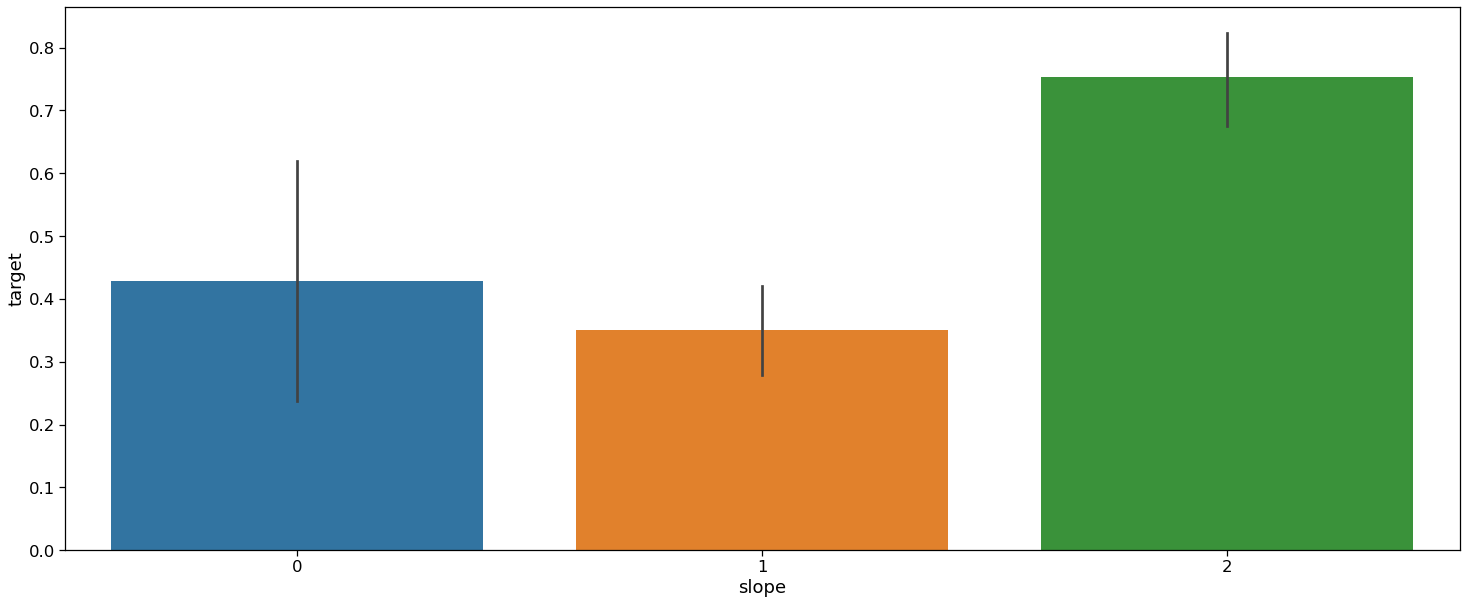

In [30]:
plt.figure(figsize=(25, 10))
sns.barplot(heart_data["slope"],heart_data["target"])

Slope '2' causes heart pain much more than Slope '0' and '1'

In [31]:
#Analysing number of major vessels (0-3) colored by flourosopy
heart_data["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ca', ylabel='target'>

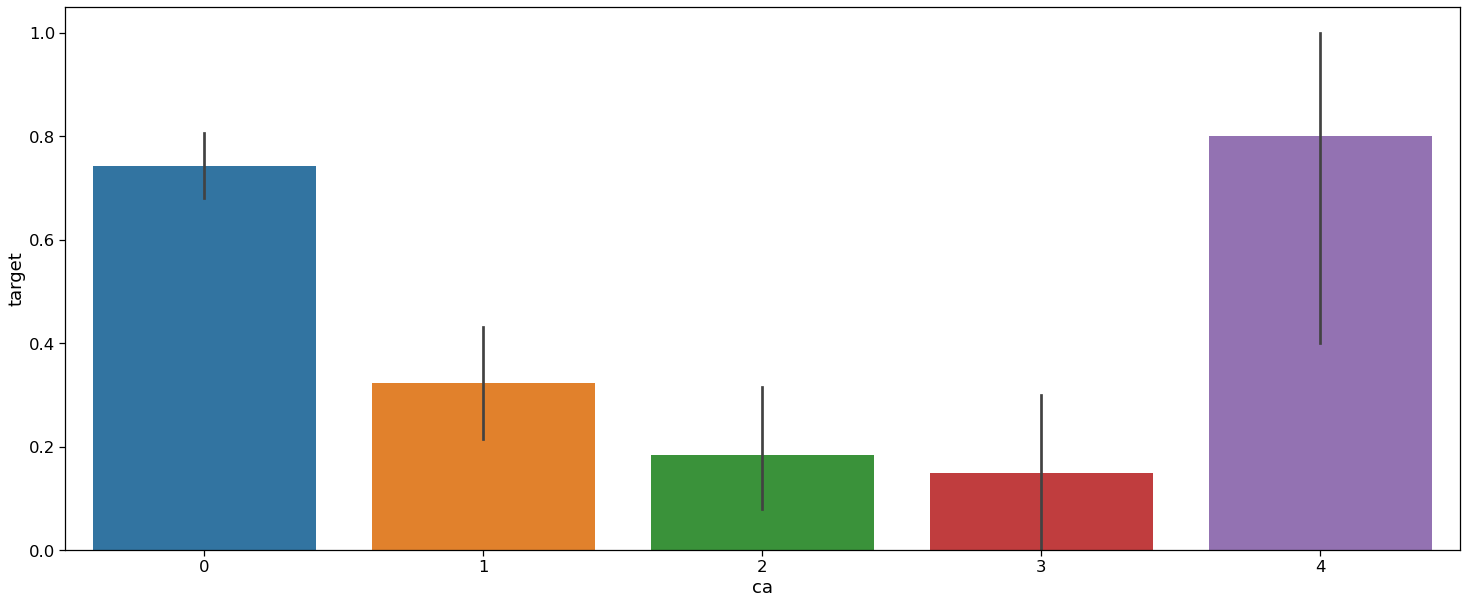

In [65]:
plt.figure(figsize=(25, 10))
sns.barplot(heart_data["ca"],heart_data["target"])

num_major_vessels=4 has astonishingly large number of heart patients

In [32]:
#Analysing A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
heart_data["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='thal', ylabel='Density'>

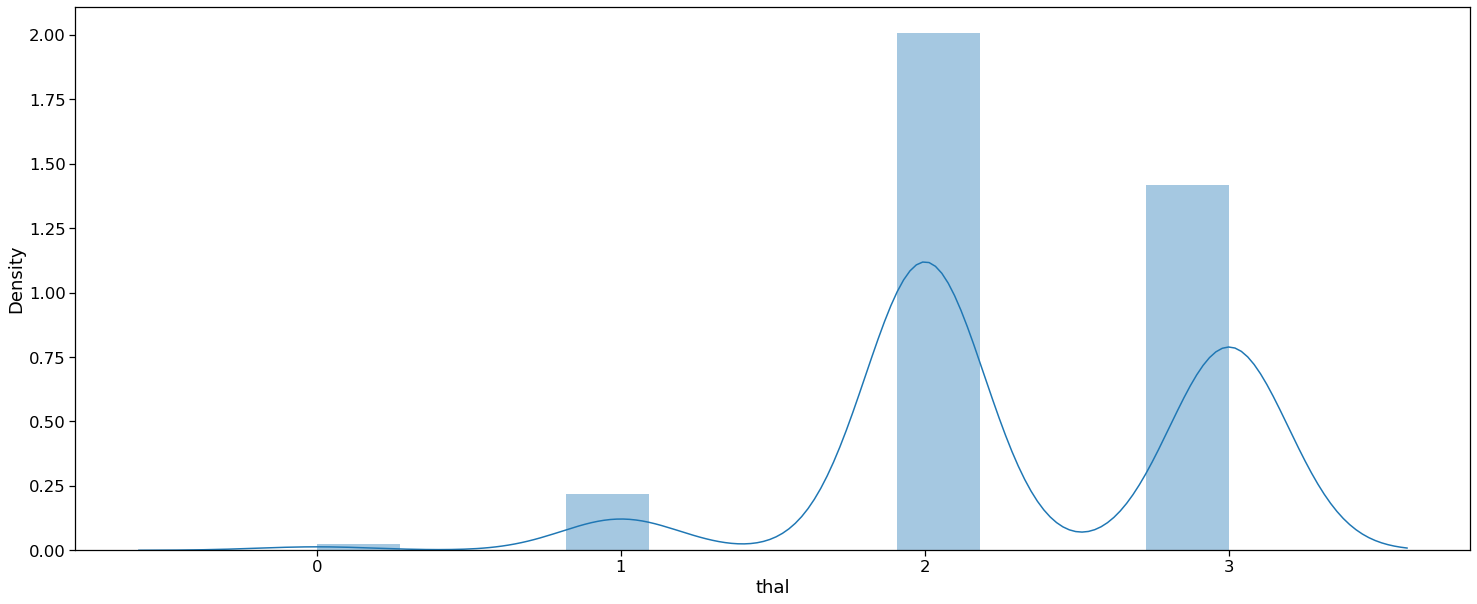

In [69]:
plt.figure(figsize=(25, 10))
sns.distplot(heart_data["thal"])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thal', ylabel='target'>

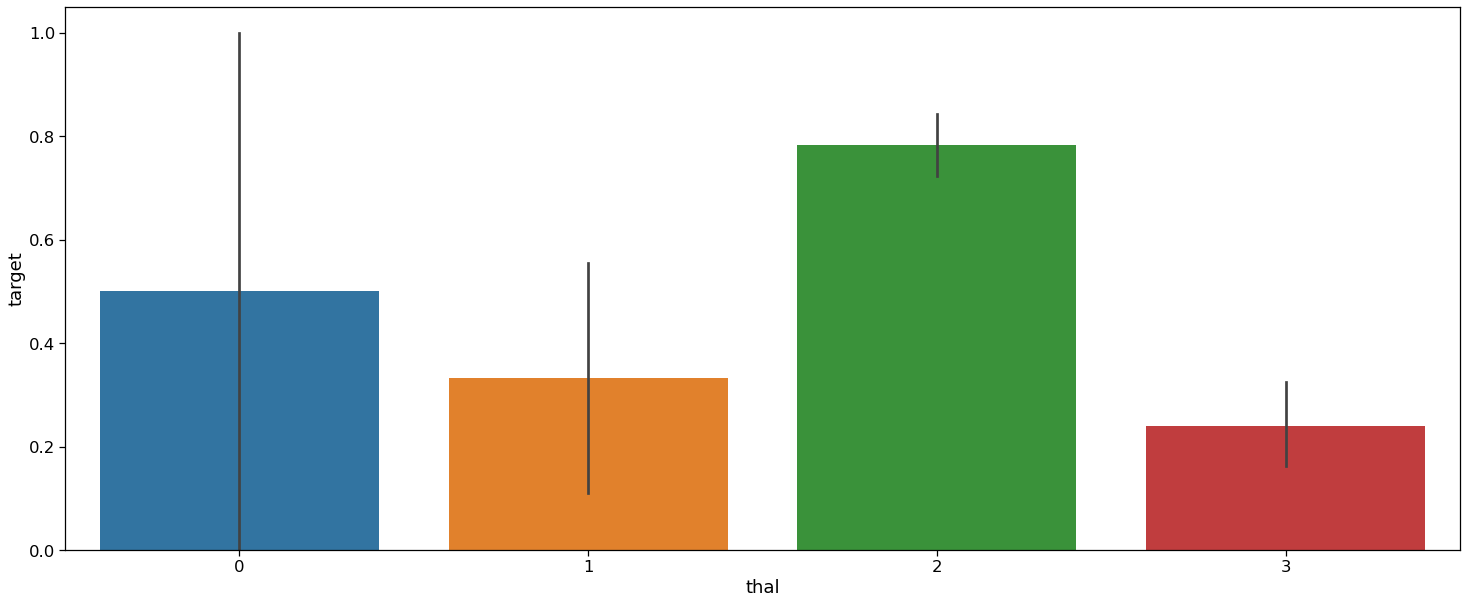

In [33]:
plt.figure(figsize=(25, 10))
sns.barplot(heart_data["thal"],heart_data["target"])

People with fixed defect are more likely to have heart disease.

Data preprocessing

In [34]:
#Complete description of data
categorical_val = []
continous_val = []
for column in heart_data.columns:
    print("--------------------")
    print(f"{column} : {heart_data[column].unique()}")
    if len(heart_data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

--------------------
age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
--------------------
sex : [1 0]
--------------------
cp : [3 2 1 0]
--------------------
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
--------------------
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 34

In [35]:
#One hot coding of categorical data
categorical_val.remove('target')
dfs = pd.get_dummies(heart_data, columns = categorical_val)

In [36]:
#Scaling
sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dfs[col_to_scale] = sc.fit_transform(dfs[col_to_scale])

In [53]:
print(dfs[col_to_scale])

          age  trestbps      chol   thalach   oldpeak
0    0.952197  0.763956 -0.256334  0.015443  1.087338
1   -1.915313 -0.092738  0.072199  1.633471  2.122573
2   -1.474158 -0.092738 -0.816773  0.977514  0.310912
3    0.180175 -0.663867 -0.198357  1.239897 -0.206705
4    0.290464 -0.663867  2.082050  0.583939 -0.379244
..        ...       ...       ...       ...       ...
298  0.290464  0.478391 -0.101730 -1.165281 -0.724323
299 -1.033002 -1.234996  0.342756 -0.771706  0.138373
300  1.503641  0.706843 -1.029353 -0.378132  2.036303
301  0.290464 -0.092738 -2.227533 -1.515125  0.138373
302  0.290464 -0.092738 -0.198357  1.064975 -0.896862

[303 rows x 5 columns]


In [37]:
X = dfs.drop('target', axis=1)
Y = dfs.target

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [39]:
print(X.shape, X_train.shape, X_test.shape)

(303, 30) (212, 30) (91, 30)


In [40]:
X_train.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
281,-0.260980,-0.206964,-0.816773,0.277826,-0.034166,0,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0
226,0.841908,-0.663867,0.671289,-2.039891,0.310912,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
109,-0.481558,-1.234996,0.149501,0.409017,-0.896862,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
64,0.400752,0.478391,-0.681494,0.671400,-0.896862,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
14,0.400752,1.049520,0.709940,0.540209,-0.034166,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0


Training model

In [42]:
model = LogisticRegression()

In [43]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

LogisticRegression()

In [44]:
# model evaluation
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [45]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8632075471698113


In [46]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [81]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8461538461538461


In [47]:
cm = confusion_matrix(Y_test, X_test_prediction) 

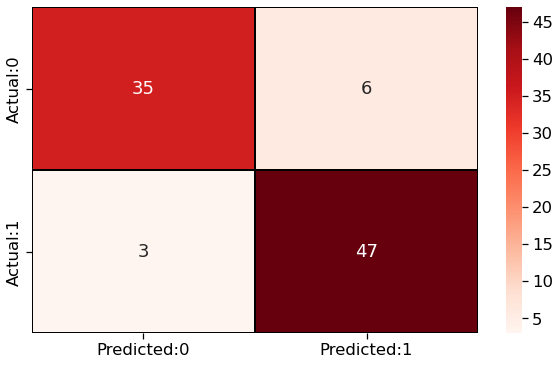

In [48]:
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (10, 6)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Reds", linecolor="Black", linewidths=1.5) 
plt.show() 